# Notebook A: Handling Missing Values and Outliers (Restricted Libraries)

This notebook demonstrates:

- Handling Missing Values with Imputation (mean, median, group-based)
- Handling Missing Values with Linear Regression Imputation
- Handling Noisy Data and Outliers (Z-score, IQR)
- Visualizations using matplotlib

**Allowed libraries only:**
- pandas
- numpy
- matplotlib.pyplot
- scipy.stats
- sklearn (LinearRegression, SimpleImputer)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


In [8]:
# Load dataset
df = pd.read_csv("data/student_performance.csv", index_col="Student_ID")

print("Initial dataset with missing values and outliers:")
display(df)

print("\nMissing values per column:")
print(df.isna().sum())


Initial dataset with missing values and outliers:


,Subject,Study_Hours,Attendance,Previous_Score,Marks_Obtained,Sleep_Hours,Participation_Score
Student_ID,,,,,,,
S01,Math,4.5,88,72,80.0,7.0,8.5
S02,Physics,2.0,76,65,NaN,6.0,7.0
S03,Chemistry,NaN,90,78,85.0,8.0,9.0
S04,Biology,1.0,60,55,40.0,NaN,5.5
S05,Math,12.0,95,88,95.0,4.0,NaN
S06,Physics,3.5,70,62,60.0,7.0,6.5
S07,Chemistry,0.5,50,40,20.0,5.0,4.0
S08,Biology,NaN,85,80,90.0,9.0,9.5
S09,Math,7.0,92,95,100.0,6.0,9.0



Missing values per column:
Subject                0
Study_Hours            3
Attendance             0
Previous_Score         0
Marks_Obtained         1
Sleep_Hours            1
Participation_Score    1
dtype: int64


## Simple Imputation: Mean, Median, Group-wise

In [9]:
# Mean imputation for Study_Hours
imputer_mean = SimpleImputer(strategy='mean')
df['Study_Hours'] = imputer_mean.fit_transform(df[['Study_Hours']])

# Median imputation for Sleep_Hours
imputer_median = SimpleImputer(strategy='median')
df['Sleep_Hours'] = imputer_median.fit_transform(df[['Sleep_Hours']])

# Group-wise mean for Participation_Score by Subject
df['Participation_Score'] = df.groupby('Subject')['Participation_Score'].transform(lambda x: x.fillna(x.mean()))

print("After simple imputations:")
display(df)


After simple imputations:


,Subject,Study_Hours,Attendance,Previous_Score,Marks_Obtained,Sleep_Hours,Participation_Score
Student_ID,,,,,,,
S01,Math,4.500,88,72,80.0,7.00,8.500000
S02,Physics,2.000,76,65,NaN,6.00,7.000000
S03,Chemistry,7.875,90,78,85.0,8.00,9.000000
S04,Biology,1.000,60,55,40.0,6.25,5.500000
S05,Math,12.000,95,88,95.0,4.00,8.666667
S06,Physics,3.500,70,62,60.0,7.00,6.500000
S07,Chemistry,0.500,50,40,20.0,5.00,4.000000
S08,Biology,7.875,85,80,90.0,9.00,9.500000
S09,Math,7.000,92,95,100.0,6.00,9.000000


## Linear Regression Imputation for Missing Marks

In [ ]:
# We will predict missing Marks_Obtained using Study_Hours as predictor

# Separate rows with and without missing Marks
train = df.dropna(subset=['Marks_Obtained'])
X_train = train[['Study_Hours']].values  # Independent variable
y_train = train['Marks_Obtained'].values  # Dependent variable

model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing marks
mask = df['Marks_Obtained'].isna()

# df.loc is used to access a group of rows and columns by labels
df.loc[mask, 'Marks_Obtained'] = model.predict(df.loc[mask, ['Study_Hours']])
# Loc is used to get data with specific labels

print("After regression imputation for Marks:")
display(df)


After regression imputation for Marks:


c:\wamp64\www\PROG8245-MachineLearingPrograming\Week_5_DataCleaning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Subject,Study_Hours,Attendance,Previous_Score,Marks_Obtained,Sleep_Hours,Participation_Score
Student_ID,,,,,,,
S01,Math,4.500,88,72,80.000000,7.00,8.500000
S02,Physics,2.000,76,65,73.571531,6.00,7.000000
S03,Chemistry,7.875,90,78,85.000000,8.00,9.000000
S04,Biology,1.000,60,55,40.000000,6.25,5.500000
S05,Math,12.000,95,88,95.000000,4.00,8.666667
S06,Physics,3.500,70,62,60.000000,7.00,6.500000
S07,Chemistry,0.500,50,40,20.000000,5.00,4.000000
S08,Biology,7.875,85,80,90.000000,9.00,9.500000
S09,Math,7.000,92,95,100.000000,6.00,9.000000


## Outlier Detection: IQR and Z-score

Q1=4.0, Q3=7.9375, IQR=3.9375, lower=-1.90625, upper=13.84375
IQR outliers:


,Subject,Study_Hours
Student_ID,,
S10,Physics,30.0
S15,Chemistry,15.0


Z-score outliers (Study_Hours >3σ):


,Subject,Study_Hours
Student_ID,,
S10,Physics,30.0


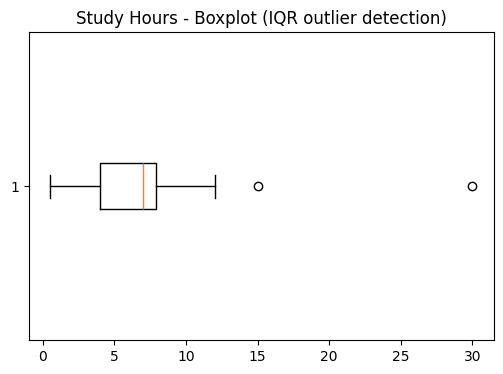

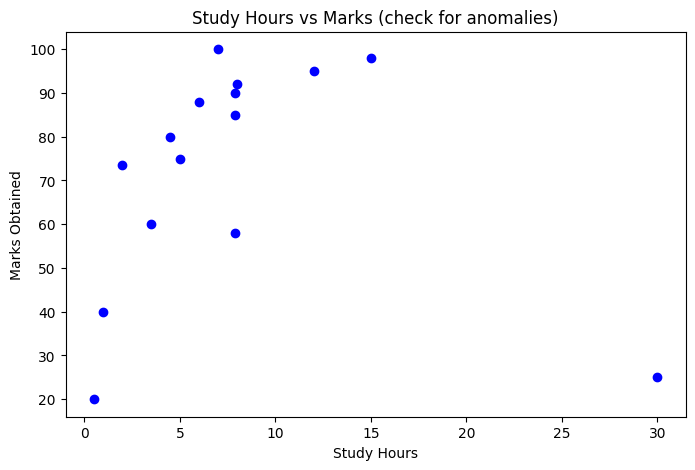

In [11]:
# IQR method on Study_Hours
s = df['Study_Hours']
Q1, Q3 = s.quantile(0.25), s.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

print(f"Q1={Q1}, Q3={Q3}, IQR={IQR}, lower={lower}, upper={upper}")
outliers_iqr = df[(df['Study_Hours'] < lower) | (df['Study_Hours'] > upper)]
print("IQR outliers:")
display(outliers_iqr[['Subject','Study_Hours']])

# Z-score method (Study_Hours)
z = np.abs(stats.zscore(s))
outliers_z = df[z > 3]
print("Z-score outliers (Study_Hours >3σ):")
display(outliers_z[['Subject','Study_Hours']])

# Plot Study Hours distribution
plt.figure(figsize=(6,4))
plt.boxplot(df['Study_Hours'], vert=False)
plt.title("Study Hours - Boxplot (IQR outlier detection)")
plt.show()

# Scatter plot for Study_Hours vs Marks to visualize anomalies
plt.figure(figsize=(8,5))
plt.scatter(df['Study_Hours'], df['Marks_Obtained'], c='blue')
plt.xlabel("Study Hours")
plt.ylabel("Marks Obtained")
plt.title("Study Hours vs Marks (check for anomalies)")
plt.show()


# Summary
- **Simple Imputation**: filled missing values using mean, median, and group-based strategies.
- **Linear Regression Imputation**: predicted missing Marks using Study_Hours.
- **Outlier Detection**: detected anomalies in Study_Hours using IQR and Z-score.
- **Visualizations**: Boxplots and scatter plots helped visualize distributions and outliers.

This notebook uses **only restricted libraries** as requested.
